In [18]:
# imports
import pandas as pd
import numpy as np
from label_utils import *
from ModelTester import ModelTester
from sklearn.metrics import confusion_matrix

%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the data

In [19]:
data = pd.read_csv("merged_data_ver_1.1.csv", index_col=0)
data.head()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country,league,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribbling,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribbling,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.73,3.40,4.2,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
1,1,1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.83,3.30,3.8,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
2,2,1,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,NaN,NaN,NaN,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,NaN,NaN,NaN,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
3,2,2,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,NaN,NaN,NaN,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2
4,4,0,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,3

In [20]:
data = process_data(data)

In [21]:
x_train, y_train, x_test, y_test, bet_train, bet_test = split_data_split_bet_agency(data)
x_train.head()

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
10872,-0.122081,0,-1,-0.215351,0,-1,-0.124373,0,0.020237,0,0.264604,1,-1,0.066267,0,-0.310802,0,0.403732,1,1,-0.121011,0,-1,-0.297636,-1,-1,0.045991,0,-0.146348,0,0.264597,1,-1,-0.341973,-1,-0.311819,0,0.176136,0,1,0.666667,0.333333,0.666667,0.333333,0.4,0.4,0.4,0.4,0.3,0.2,0.6,0.2,0.40,0.20,0.60,0.25
11599,-0.205415,0,-1,0.034649,0,1,-0.293864,0,-0.313097,0,-0.080224,0,1,-0.239855,0,-0.102469,0,-0.050813,0,-1,0.128989,0,-1,-0.130970,0,1,-0.038755,0,-0.313015,0,0.178390,0,1,-0.035850,0,-0.103486,0,-0.051137,0,-1,0.666667,0.333333,0.666667,0.000000,0.4,0.6,0.6,0.2,0.3,0.5,0.4,0.2,0.35,0.30,0.40,0.15
9601,0.177919,0,0,-0.098684,0,1,0.079017,0,-0.063097,0,-0.045741,0,1,-0.076590,0,-0.081635,0,0.062823,0,-1,0.162322,0,0,0.352364,1,1,-0.191297,0,0.153652,0,0.023218,0,1,0.004966,0,0.104848,0,-0.005682,0,-1,0.333333,0.333333,0.333333,0.000000,0.2,0.2,0.6,0.0,0.2,0.2,0.5,0.1,0.35,0.20,0.45,0.20
10085,0.094585,0,0,-0.098684,0,1,0.197661,0,0.120237,0,-0.304362,0,1,0.168308,0,0.189198,0,0.085550,0,-1,0.345655,1,-1,0.119030,0,1,0.418872,1,0.003652,0,0.109424,0,1,0.290680,0,0.459014,1,-0.051137,0,-1,0.333333,0.333333,0.666667,0.000000,0.4,0.2,0.6,0.0,0.3,0.3,0.6,0.1,0.30,0.35,0.60,0.15
10550,-0.122081,0,-1,-0.298684,-1,1,-0.293864,0,-0.146430,0,0.178397,0,1,-0.341896,-1,0.418365,1,0.290096,0,1,0.295655,1,-1,-0.297636,-1,-1,0.130736,0,0.103652,0,0.264597,1,-1,0.168231,0,-0.415986,-1,0.403409,1,1,0.333333,0.000000,1.000000,0.000000,0.2,0.4,1.0,0.0,0.3,0.2,0.8,0.2,0.35,0.20,0.65,0.20


In [22]:
x_train.values.shape
columns = x_train.values.shape[1]
columns

56

## First neural model start here

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 40)                2280      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 33        
Total params: 3,343
Trainable params: 3,343
Non-trainable params: 0
_________________________________________________________________


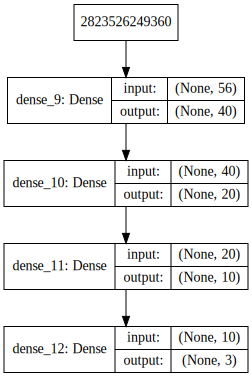

In [23]:
from keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Input, Activation, Flatten, Dense, Concatenate
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import pydot as pyd
from keras.utils.np_utils import to_categorical
keras.utils.vis_utils.pydot = pyd

def build_keras_model():
    model = Sequential()
    model.add(Dense(units=40, input_dim=columns, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
    model.add(Dense(units=20, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
    model.add(Dense(units=10, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
    model.add(Dense(units=3, activation='softmax', kernel_regularizer=regularizers.l2(0.0002)))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy']) # categorical_crossentropy
    return model

model = build_keras_model()

model.summary()

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
history = model.fit(x_train, to_categorical(y_train+1), batch_size=32, epochs=100, validation_split=0.04)

Train on 19705 samples, validate on 822 samples
Epoch 1/100
19705/19705 [==============================] - 2s 83us/step - loss: 0.2336 - acc: 0.4373 - val_loss: 0.2333 - val_acc: 0.4343
Epoch 2/100
19705/19705 [==============================] - 1s 51us/step - loss: 0.2259 - acc: 0.4695 - val_loss: 0.2281 - val_acc: 0.4392
Epoch 3/100
19705/19705 [==============================] - 1s 51us/step - loss: 0.2201 - acc: 0.4903 - val_loss: 0.2216 - val_acc: 0.4635
Epoch 4/100
19705/19705 [==============================] - 1s 51us/step - loss: 0.2157 - acc: 0.5056 - val_loss: 0.2180 - val_acc: 0.4732
Epoch 5/100
19705/19705 [==============================] - 1s 51us/step - loss: 0.2131 - acc: 0.5094 - val_loss: 0.2160 - val_acc: 0.4793
Epoch 6/100
19705/19705 [==============================] - 1s 53us/step - loss: 0.2114 - acc: 0.5130 - val_loss: 0.2140 - val_acc: 0.4866
Epoch 7/100
19705/19705 [==============================] - 1s 52us/step - loss: 0.2100 - acc: 0.5154 - val_loss: 0.2129 - va

19705/19705 [==============================] - 1s 52us/step - loss: 0.1979 - acc: 0.5328 - val_loss: 0.2012 - val_acc: 0.5036
Epoch 60/100
19705/19705 [==============================] - 1s 55us/step - loss: 0.1979 - acc: 0.5355 - val_loss: 0.2012 - val_acc: 0.5024
Epoch 61/100
19705/19705 [==============================] - 1s 59us/step - loss: 0.1978 - acc: 0.5349 - val_loss: 0.2015 - val_acc: 0.5061
Epoch 62/100
19705/19705 [==============================] - 1s 67us/step - loss: 0.1978 - acc: 0.5349 - val_loss: 0.2012 - val_acc: 0.5024
Epoch 63/100
19705/19705 [==============================] - 1s 56us/step - loss: 0.1977 - acc: 0.5357 - val_loss: 0.2016 - val_acc: 0.5036
Epoch 64/100
19705/19705 [==============================] - 1s 56us/step - loss: 0.1976 - acc: 0.5350 - val_loss: 0.2011 - val_acc: 0.5036
Epoch 65/100
19705/19705 [==============================] - 1s 60us/step - loss: 0.1976 - acc: 0.5344 - val_loss: 0.2017 - val_acc: 0.5036
Epoch 66/100
19705/19705 [==============

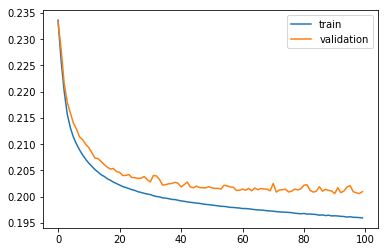

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

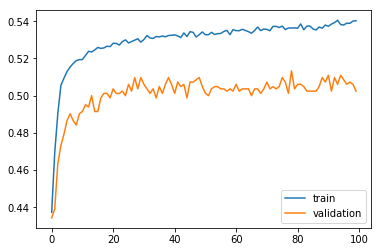

In [26]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [51]:
predictions = np.argmax(model.predict(x_test), axis=1)-1
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5280592361652378


### Let's have a look into labels of the Train, Test sets and Predictions

In [27]:
np.argmax(model.predict(x_test[:30]), axis=1)-1, y_test.values[:30]

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([ 0, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
         1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1], dtype=int64))

In [28]:
modelTester = ModelTester(model, x_train, y_train, x_test, y_test, bet_train, bet_test)

In [29]:
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Home win count:", (y_train==-1).sum())
print("Draw count:", (y_train==0).sum())
print("Away win count:", (y_train==1).sum())

Y train
Unique train labels: [-1  0  1]
Home win count: 9420
Draw count: 5217
Away win count: 5890


In [30]:
print("Train Prediction")
predictions = np.argmax(model.predict(x_train), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Train Prediction
Unique train labels: [-1  0  1]
Home win count: 13253
Draw count: 730
Away win count: 6544


In [31]:
modelTester.get_train_confusion_matrix()

,pred home,pred draw,pred away
true home,7538,232,1650
true draw,3194,314,1709
true away,2521,184,3185


In [32]:
print("Y test")
print("Unique train labels:", np.unique(y_test.values))
print("Home win count:", (y_test==-1).sum())
print("Draw count:", (y_test==0).sum())
print("Away win count:", (y_test==1).sum())

Y test
Unique train labels: [-1  0  1]
Home win count: 2354
Draw count: 1300
Away win count: 1478


In [33]:
print("Test Prediction")
predictions = np.argmax(model.predict(x_test), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Test Prediction
Unique train labels: [-1  0  1]
Home win count: 3280
Draw count: 183
Away win count: 1669


In [34]:
modelTester.get_test_confusion_matrix()

,pred home,pred draw,pred away
true home,1839,74,441
true draw,805,69,426
true away,636,40,802


# Feature importance

In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
import eli5
from eli5.sklearn import PermutationImportance

my_model = KerasClassifier(build_fn=build_keras_model, batch_size=32, epochs=100, validation_split=0.04)
my_model.fit(x_train, to_categorical(y_train+1))

perm = PermutationImportance(my_model, random_state=1).fit(x_train, to_categorical(y_train+1))

Train on 19705 samples, validate on 822 samples
Epoch 1/100
19705/19705 [==============================] - 2s 92us/step - loss: 0.2330 - acc: 0.4461 - val_loss: 0.2325 - val_acc: 0.4294
Epoch 2/100
19705/19705 [==============================] - 1s 54us/step - loss: 0.2252 - acc: 0.4733 - val_loss: 0.2253 - val_acc: 0.4611
Epoch 3/100
19705/19705 [==============================] - 1s 53us/step - loss: 0.2187 - acc: 0.4990 - val_loss: 0.2203 - val_acc: 0.4805
Epoch 4/100
19705/19705 [==============================] - 1s 53us/step - loss: 0.2152 - acc: 0.5057 - val_loss: 0.2177 - val_acc: 0.4842
Epoch 5/100
19705/19705 [==============================] - 1s 53us/step - loss: 0.2132 - acc: 0.5114 - val_loss: 0.2159 - val_acc: 0.4964
Epoch 6/100
19705/19705 [==============================] - 1s 57us/step - loss: 0.2116 - acc: 0.5152 - val_loss: 0.2141 - val_acc: 0.4927
Epoch 7/100
19705/19705 [==============================] - 1s 52us/step - loss: 0.2104 - acc: 0.5166 - val_loss: 0.2128 - va

19705/19705 [==============================] - 1s 52us/step - loss: 0.1977 - acc: 0.5359 - val_loss: 0.2009 - val_acc: 0.5049
Epoch 60/100
19705/19705 [==============================] - 1s 57us/step - loss: 0.1977 - acc: 0.5364 - val_loss: 0.2018 - val_acc: 0.5024
Epoch 61/100
19705/19705 [==============================] - 1s 55us/step - loss: 0.1976 - acc: 0.5358 - val_loss: 0.2023 - val_acc: 0.5049
Epoch 62/100
19705/19705 [==============================] - 1s 58us/step - loss: 0.1975 - acc: 0.5363 - val_loss: 0.2023 - val_acc: 0.5049
Epoch 63/100
19705/19705 [==============================] - 1s 54us/step - loss: 0.1975 - acc: 0.5350 - val_loss: 0.2016 - val_acc: 0.5036
Epoch 64/100
19705/19705 [==============================] - 1s 54us/step - loss: 0.1975 - acc: 0.5360 - val_loss: 0.2012 - val_acc: 0.5036
Epoch 65/100
19705/19705 [==============================] - 1s 53us/step - loss: 0.1974 - acc: 0.5359 - val_loss: 0.2017 - val_acc: 0.5061
Epoch 66/100
19705/19705 [==============

20527/20527 [==============================] - 1s 27us/step


20527/20527 [==============================] - 1s 25us/step


In [36]:
eli5.show_weights(perm, feature_names = list(x_train), top=None)

Weight,Feature
0.0365 ± 0.0025,home_win_last_20_matches
0.0365 ± 0.0048,away_win_last_20_matches
0.0084 ± 0.0033,away_win_last_10_matches
0.0049 ± 0.0025,away_draw_last_10_matches
0.0042 ± 0.0016,home_buildUpPlaySpeedClass
0.0037 ± 0.0009,home_chanceCreationCrossingClass
0.0028 ± 0.0016,away_draw_last_20_matches
0.0027 ± 0.0009,away_chanceCreationPositioningClass
0.0025 ± 0.0024,home_chanceCreationPassingClass
0.0024 ± 0.0020,home_draw_last_10_matches


## Betting time...

### Outcome when bet on home team
Just a sanity check. Should not see high/any yields

In [37]:
agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']

In [38]:
print("Test set size", y_test.shape)

Test set size (5132,)


### Sanity checks by static betting

In [39]:
modelTester.predict_home_wins_only_profit(data="train")

Agency B365, 	win amount: -358.02
Agency BW, 	win amount: -672.98
Agency IW, 	win amount: -1066.66
Agency LB, 	win amount: -809.56
Agency WH, 	win amount: -522.30
Agency SJ, 	win amount: 413.09
Agency VC, 	win amount: -158.62
Agency GB, 	win amount: 570.80
Agency BS, 	win amount: 566.73


In [40]:
modelTester.predict_home_wins_only_profit(data="test")

Agency B365, 	win amount: -24.49
Agency BW, 	win amount: -109.16
Agency IW, 	win amount: -207.18
Agency LB, 	win amount: -137.50
Agency WH, 	win amount: -70.90
Agency SJ, 	win amount: 151.43
Agency VC, 	win amount: 28.22
Agency GB, 	win amount: 172.61
Agency BS, 	win amount: 167.05


In [41]:
modelTester.predict_draw_only_profit(data="train")

Agency B365, 	win amount: -1510.41
Agency BW, 	win amount: -1904.15
Agency IW, 	win amount: -2422.72
Agency LB, 	win amount: -2037.35
Agency WH, 	win amount: -2249.13
Agency SJ, 	win amount: -1612.36
Agency VC, 	win amount: -1259.90
Agency GB, 	win amount: -1998.52
Agency BS, 	win amount: -1916.66


In [42]:
modelTester.predict_away_wins_only_profit(data="test")

Agency B365, 	win amount: -193.12
Agency BW, 	win amount: -391.92
Agency IW, 	win amount: -544.97
Agency LB, 	win amount: -420.50
Agency WH, 	win amount: -356.55
Agency SJ, 	win amount: 283.93
Agency VC, 	win amount: -106.94
Agency GB, 	win amount: 304.80
Agency BS, 	win amount: 324.83


In [43]:
modelTester.predict_bet_home_away_profit(data="train")

Agency B365, 	win amount: -1255.44
Agency BW, 	win amount: -2308.64
Agency IW, 	win amount: -3345.15
Agency LB, 	win amount: -2503.40
Agency WH, 	win amount: -1956.18
Agency SJ, 	win amount: 1448.62
Agency VC, 	win amount: -678.29
Agency GB, 	win amount: 1651.16
Agency BS, 	win amount: 1845.30


In [44]:
modelTester.predict_bet_home_away_profit(data="test")

Agency B365, 	win amount: -217.62
Agency BW, 	win amount: -501.08
Agency IW, 	win amount: -752.15
Agency LB, 	win amount: -558.00
Agency WH, 	win amount: -427.44
Agency SJ, 	win amount: 435.37
Agency VC, 	win amount: -78.72
Agency GB, 	win amount: 477.41
Agency BS, 	win amount: 491.88


In [45]:
modelTester.predict_bet_on_all_profit(data="train")

Agency B365, 	win amount: -2765.85
Agency BW, 	win amount: -4212.79
Agency IW, 	win amount: -5767.86
Agency LB, 	win amount: -4540.75
Agency WH, 	win amount: -4205.31
Agency SJ, 	win amount: -163.74
Agency VC, 	win amount: -1938.20
Agency GB, 	win amount: -347.36
Agency BS, 	win amount: -71.36


In [46]:
modelTester.predict_bet_on_all_profit(data="test")

Agency B365, 	win amount: -621.65
Agency BW, 	win amount: -992.96
Agency IW, 	win amount: -1379.64
Agency LB, 	win amount: -1088.70
Agency WH, 	win amount: -1013.40
Agency SJ, 	win amount: 29.11
Agency VC, 	win amount: -420.18
Agency GB, 	win amount: -40.25
Agency BS, 	win amount: -6.11


### Bet on every match
Always bet on the predicted winner.

In [47]:
modelTester.always_bet_predicted_winner_profit()

Agency B365, 	win amount: 613.18
Agency BW, 	win amount: 520.03
Agency IW, 	win amount: 452.74
Agency LB, 	win amount: 496.73
Agency WH, 	win amount: 560.19
Agency SJ, 	win amount: 1344.42
Agency VC, 	win amount: 674.26
Agency GB, 	win amount: 1570.76
Agency BS, 	win amount: 1586.42


### Bet when expected return high enough
First calculate the expected return of the team expected to win. If yield is high enough, then bet. 
* yield = prediction probability * odds. 
* Bet if yield > threshold.

In [48]:
modelTester.bet_predicted_winner_with_threshold_profit("test", threshold=1)

Agency B365, 	win amount: 2271.63. Didn't bet on 70.95% of matches
Agency BW, 	win amount: 2160.75. Didn't bet on 71.77% of matches
Agency IW, 	win amount: 2061.74. Didn't bet on 71.78% of matches
Agency LB, 	win amount: 2120.68. Didn't bet on 71.92% of matches
Agency WH, 	win amount: 2210.53. Didn't bet on 71.02% of matches
Agency SJ, 	win amount: 3146.63. Didn't bet on 65.43% of matches
Agency VC, 	win amount: 2356.20. Didn't bet on 70.44% of matches
Agency GB, 	win amount: 3408.79. Didn't bet on 63.04% of matches
Agency BS, 	win amount: 3426.57. Didn't bet on 62.92% of matches


### Bet on highest return
Multiplies the neural network match predictions with betting odds and from these multiplications chooses from home win, draw, away win the highest expected return value. A threshhold can be set to choose if the yield is high enough to bet.  [prediction probability * odds > threshold]

In [49]:
modelTester.predict_on_highest_return(threshold=2.5)

Agency B365, 	win amount: -66.00. Didn't bet on 97.92% of matches
Agency BW, 	win amount: -40.00. Didn't bet on 98.67% of matches
Agency IW, 	win amount: -18.00. Didn't bet on 99.20% of matches
Agency LB, 	win amount: -41.00. Didn't bet on 98.62% of matches
Agency WH, 	win amount: -53.00. Didn't bet on 98.30% of matches
Agency SJ, 	win amount: -116.00. Didn't bet on 95.30% of matches
Agency VC, 	win amount: -83.00. Didn't bet on 97.51% of matches
Agency GB, 	win amount: -92.00. Didn't bet on 95.56% of matches
Agency BS, 	win amount: -107.00. Didn't bet on 95.11% of matches
